In [2]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns

import typing_extensions
from sklearn.datasets import load_iris
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
iris = load_iris()

In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [13]:
df = pd.read_csv('iris.csv')

df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_columns

Index(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'], dtype='object')

In [16]:
scaler = MinMaxScaler()
scaler.fit(df[numeric_columns])

df[numeric_columns] = scaler.transform(df[numeric_columns])

In [18]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa


# Elbow Method

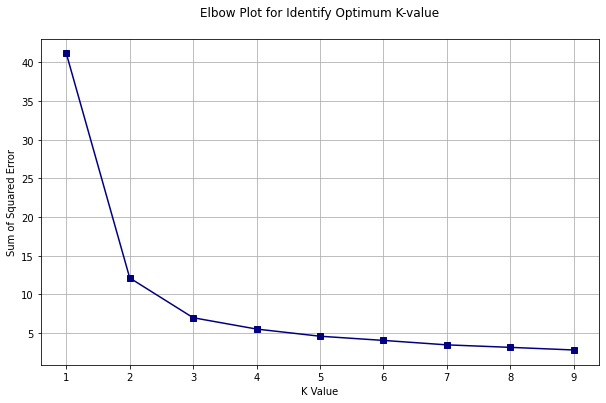

In [20]:
sum_squared_error = []
K_range = range(1,10)

for k in K_range:
    kmean = KMeans(n_clusters = k)
    kmean.fit(df[numeric_columns])
    sum_squared_error.append(kmean.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range,sum_squared_error, marker='s', color='navy')
plt.title("Elbow Plot for Identify Optimum K-value",y=1.05)
plt.xlabel("K Value")
plt.ylabel("Sum of Squared Error")
plt.grid(True) 

In [21]:
sum_squared_error

[41.16611042137328,
 12.127790750538193,
 6.982216473785235,
 5.51693347204037,
 4.58977540011789,
 4.047833652523183,
 3.473002417112734,
 3.150011261682281,
 2.81075565914608]

# K Mean Apply

In [22]:
Optimum_K = 3

kmean = KMeans(n_clusters=Optimum_K)
Cluster_predicted = kmean.fit_predict(df[numeric_columns])
Cluster_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [26]:
df['Cluster'] = Cluster_predicted
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species,Cluster
0,0.222222,0.625000,0.067797,0.041667,setosa,0
1,0.166667,0.416667,0.067797,0.041667,setosa,0
2,0.111111,0.500000,0.050847,0.041667,setosa,0
3,0.083333,0.458333,0.084746,0.041667,setosa,0
4,0.194444,0.666667,0.067797,0.041667,setosa,0


In [27]:
kmean.cluster_centers_

array([[0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632],
       [0.44125683, 0.30737705, 0.57571548, 0.54918033]])

In [28]:
pca = PCA()
pca_features = pca.fit_transform(df[numeric_columns])

In [34]:
pca_features[0:5]

array([[-0.63070293,  0.10757791, -0.0187191 , -0.00730695],
       [-0.62290494, -0.10425983, -0.04914203, -0.03235899],
       [-0.6695204 , -0.05141706,  0.01964417, -0.00743435],
       [-0.65415276, -0.10288487,  0.02321855,  0.02011443],
       [-0.64878806,  0.13348758,  0.01511552,  0.0117863 ]])

In [53]:
pca_df = pd.DataFrame(pca_features)
pca_df['Cluster'] = Cluster_predicted

centroids = pca_df.groupby('Cluster').mean().reset_index()
centroids

,Cluster,0,1,2,3
0,0,-0.618424,0.068585,0.000843,-0.004909
1,1,0.556727,0.103688,0.007055,-0.008665
2,2,0.150965,-0.122510,-0.005201,0.009563


In [89]:
centroids.iloc[:, :3]

,Cluster,0,1
0,0,-0.618424,0.068585
1,1,0.556727,0.103688
2,2,0.150965,-0.122510


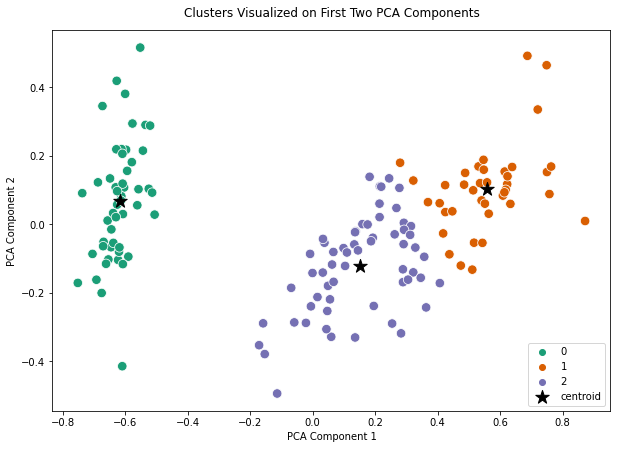

In [91]:
# Visualize Clusters
pca_2d = pca_features[:, :2]
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=df['Cluster'], palette='Dark2',s=90)
plt.scatter(centroids[0],centroids[1],color='black',marker='*',label='centroid',s=200)
plt.title('Clusters Visualized on First Two PCA Components',y=1.02)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Cluster Wise Numeric Aggregation

In [92]:
df1 = pd.read_csv("iris.csv")
df1.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [94]:
df1.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
df1.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [95]:
df1['Cluster'] = Cluster_predicted

In [96]:
# Numeric aggregation
numeric_analysis = df1.groupby('Cluster', as_index=False)[numeric_columns].mean()
numeric_analysis = numeric_analysis[['Cluster', 'Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']]
numeric_analysis.round(2)

,Cluster,Sepal Length,Sepal Width,Petal Length,Petal Width
0,0,5.01,3.43,1.46,0.25
1,1,6.85,3.08,5.70,2.08
2,2,5.89,2.74,4.40,1.42


In [97]:
categorical_columns = [col for col in df1.columns if col not in numeric_columns and col != 'Cluster']

In [98]:
categorical_columns

['Species']

In [107]:
# Categorical aggregation: Count occurrences of each category per cluster
categorical_analysis = {}
for col in categorical_columns:
    counts = df1.groupby('Cluster')[col].value_counts().unstack(fill_value=0)
    counts.columns = [f"{col}_{val}" for val in counts.columns]  # Rename columns to include category values
    categorical_analysis[col] = counts

# Combine categorical counts into a single DataFrame
categorical_analysis_df = pd.concat(categorical_analysis.values(), axis=1).reset_index()

# Combine numeric and categorical summaries
cluster_analysis = pd.merge(numeric_analysis, categorical_analysis_df, on='Cluster', how='left')

# Display the combined analysis
cluster_analysis

,Cluster,Sepal Length,Sepal Width,Petal Length,Petal Width,Species_setosa,Species_versicolor,Species_virginica
0,0,5.006000,3.428000,1.462000,0.246000,50,0,0
1,1,6.846154,3.082051,5.702564,2.079487,0,3,36
2,2,5.888525,2.737705,4.396721,1.418033,0,47,14


# Cluster Summary By AI

In [116]:
# Asking an LLM so summarize the results

from groq import Groq
# Initialize the Groq client
client = Groq(api_key='')

# Convert DataFrame to JSON or other structured format
data_json = cluster_analysis.to_json(orient='records')

# Define the prompt
prompt = f"Summarize the dataset by providing a concise profile for each cluster(Cluster 0 to Cluster 2) and use proper variable & type names fully. Avoid `` & use - .For each cluster, list: 1.The number of samples in the cluster.2.The average (mean) value for each numeric feature.3.The average and distribution of the value for each categorical feature in percentage form.4.The average and distribution of the 'Species' column, highlighting the proportion of samples in each stage (0, 1, 2). 5.focusing on the main characteristics by analysis of numerics that distinguish each cluster. Present the summary as a list, with one section per cluster.\n{data_json}"

# Define the model you want to use
model_name = 'llama-3.3-70b-versatile'  # Change this to the model you want to use

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": "you are a helpful assistant."
        },
        {
            "role": "user",
            "content": prompt,
        }
    ],
    model=model_name,
)

print(chat_completion.choices[0].message.content)

cluster_summaries = chat_completion.choices[0].message.content



Here is a summary of the dataset, providing a concise profile for each cluster:

1. **Cluster 0**
   - **Number of samples**: 50
   - **Average numeric feature values**:
     - **Sepal Length**: 5.006
     - **Sepal Width**: 3.428
     - **Petal Length**: 1.462
     - **Petal Width**: 0.246
   - **Categorical feature distribution**:
     - **Species**: 
       - **setosa**: 100.00%
       - **versicolor**: 0.00%
       - **virginica**: 0.00%
   - **Main distinguishing characteristics**: Cluster 0 is marked by the smallest Sepal Length, Sepal Width, Petal Length, and Petal Width, and it exclusively contains samples of the setosa species.

2. **Cluster 1**
   - **Number of samples**: 39
   - **Average numeric feature values**:
     - **Sepal Length**: 6.8461538462
     - **Sepal Width**: 3.0820512821
     - **Petal Length**: 5.7025641026
     - **Petal Width**: 2.0794871795
   - **Categorical feature distribution**:
     - **Species**: 
       - **setosa**: 0.00%
       - **versicolor**:

# Exporting our Models/Results/Data

In [122]:
# Storing our results
import pickle
import json

with open('kmeans_model.pkl', 'wb') as model_file:
    pickle.dump(kmean, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Save cluster_summaries as a pickle file
with open('cluster_summaries.pkl', 'wb') as summary_file:
    pickle.dump(cluster_summaries, summary_file)

# Save PCA first two components and cluster labels
PCA_2d_df = pd.DataFrame(pca_features[:, :2], columns=['PCA1', 'PCA2'])
PCA_2d_df['Cluster'] = df['Cluster'] # Assuming 'Cluster' is in data_encoded

# Save to Excel
PCA_2d_df.to_excel('PCA_2d.xlsx', index=False)

# Export the cluster_analysis DataFrame to an Excel file
cluster_analysis.to_excel('cluster_analysis.xlsx', index=False)

# Exporting the data with predictions
df1.to_excel('Main Data With Cluster.xlsx', index=False)

# Export cluster_summaries to a text file
with open('cluster_summaries.txt', 'w') as file:
    file.write(json.dumps(cluster_summaries, indent=4))

In [123]:
df1.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species,Cluster
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
